# Analise de Dados do Titanic

# Introdução: 



O desenvolvimento da tecnologia no decorrer dos anos crece exponencialmente e permite ao ser humano resolver diversos problemas em distintas áreas, sendo assim, a evolução tecnológica possibilitou várias mudanças sociais como o acesso a informação, a grande quantidade de informação gerada e a transformação da informação para conhecimento.

Com o advento da tecnológia tornou-se imprescindivel que as empresas conheçam bem sues negócios e tomem as melhores decisões, pois a as estruturas de mercado sofrem constantes mudanças e todos tem acesso as mesma tecnológias.

Dentro os aspectos abordados compreende-se o quanto é importante aos gestores compreender as instituições, e a partir surge a analise de dados que torna inteligivel as informações geradas constantemente e massivamente nas empresas permitindo a construção de parâmetros para que os diretores tenham melhores fundamentos na tomada de decisão.

# Questionamentos:

1. Quantas pessoas sobreviveram ao Titanic?

       
2. Quantas pessoas estavam distribuída por classe no Titanic?


3. Qual a média de idade das pessoas estavam no Titanic?
    
 
4. Quantas pessoas estavam distribuídas por sexo no Titanic?
    

5. Qual a classe que em média tem mais sobreviventes no Titanic?

      
6. Qual a relação entre a faixa etária dos sobreviventes?
   
    
7. Qual a realação entre as tarifas pagas pelas pessoas e os sobreviventes do Titanic? 
    
        
8. Qual o sexo que em média tem mais sobreviventes no Titanic? 

      
9. Qual a relação entre o número de parentes abordados e os sobreviventes?   

In [177]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('titanic-data-6.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [178]:
#avaliar os dados
df.shape

(891, 12)

In [179]:
#avaliar os dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [180]:
#avaliar os dados
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [181]:
#avaliar os dados
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [182]:
#limpar os dados: colocar a média da coluna Age e preencher oa dados faltantes da coluna
mean= df['Age'].mean()
df['Age'].fillna(mean, inplace= True)

In [183]:
#limpar os dados: confirmar que os dados faltantes foram preenchidos pela média da coluna Age
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [184]:
#limpar os dados; verificar os dados duplicados
df.duplicated()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
861    False
862    False
863    False
864    False
865    False
866    False
867    False
868    False
869    False
870    False
871    False
872    False
873    False
874    False
875    False
876    False
877    False
878    False
879    False
880    False
881    False
882    False
883    False
884    False
885    False
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [185]:
#limpar os dados: unir os elementos que estejam duplicados
sum(df.duplicated())

0

In [186]:
#limpar os dados: transformar uma coluna de float em inteiro
df['Age']= df['Age'].values.astype(np.int64)

In [187]:
#limpar os dados: confirmar a troca de tipo de dados da coluna Age
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null int64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(1), int64(6), object(5)
memory usage: 83.6+ KB


O gráfico geral permite verificar os distintos elemento ao qual vamos analisar.

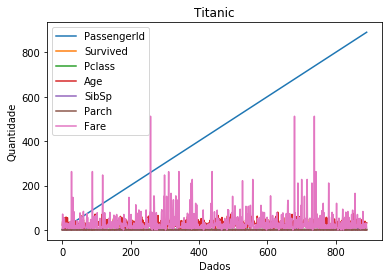

In [190]:
#demonstrar o gráfico através da planilha
df.plot(kind='line',title='Titanic')
plt.xlabel('Dados')
plt.ylabel('Quantidade')
plt.show()

# Quantas pessoas sobreviveram ao Titanic?

sobrevirem 342 pessoas, desta forma, observa-se que só 38,4% dos passageiros sobreviveram

In [146]:
#com o objetivo de contar os elementos da coluna com o intuito de não ocorrer repetições.
def count(dado):
   b = df[dado].value_counts()
   return [b]

In [147]:
print(count('Survived'))

[0    549
1    342
Name: Survived, dtype: int64]


O gráfico corrobora ao elemento analisado acima.

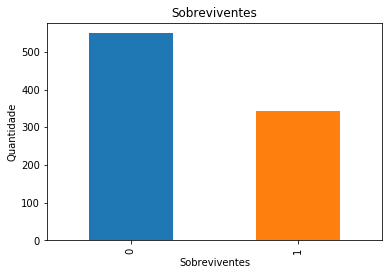

In [201]:
df['Survived'].value_counts().plot(kind='bar')
plt.title('Sobreviventes')
plt.xlabel('Sobreviventes')
plt.ylabel('Quantidade')
plt.show()

# Quantas pessoas estavam distribuída por classe no Titanic?

Na primeira classe 216 pessoas, compreendia a 24,2% dos total de passageiros Na segunda classe 184 pessoas, compreendia a 20,7% dos total de passageiros Na terceira classe 491 pessoas, compreendia a 55,1% dos total de passageiros

In [150]:
print(count('Pclass'))

[3    491
1    216
2    184
Name: Pclass, dtype: int64]


O gráfico corrobora ao elemento analisado acima.

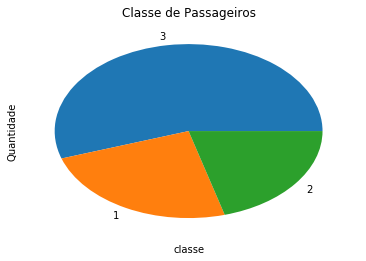

In [189]:
#demonstrar o gráfico através da coluna Pclass 
df['Pclass'].value_counts().plot(kind='pie', title='Classe de Passageiros')
plt.xlabel('classe')
plt.ylabel('Quantidade')
plt.show()

# Qual a média de idade das pessoas estavam no Titanic?

29 anos, a grande maioria dos passageiros estavam entre os 20 a 40 anos

In [142]:
#com o objetivo verificar a media de alguns dados, com o intuito de não haver repetição nos dados.
def media( dado ):
   a= df[dado].mean()
   return [a]

In [138]:
print (media('Age'))

[29.544332210998878]


O gráfico corrobora ao elemento analisado acima.

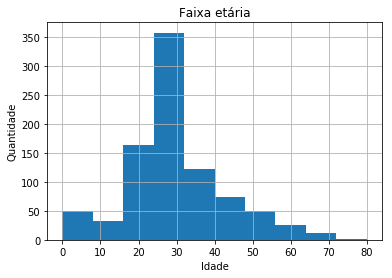

In [192]:
#demonstrar o gráfico através da coluna Age
df['Age'].hist()
plt.title('Faixa etária')
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.show()

# Quantas pessoas estavam distribuídas por sexo no Titanic?

Masculinos 577, compreendia a 65,8% dos total de passageiros Femininos 314, compreendia a 35,2% dos total de passageiros. Destaco a posterior no gráfico.

In [141]:
print(count('Sex'))

[male      577
female    314
Name: Sex, dtype: int64]


O gráfico corrobora ao elemento analisado acima.

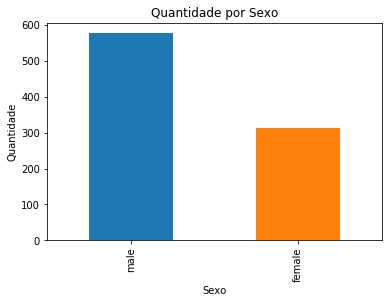

In [188]:
#demonstrar o gráfico através da coluna Sex a partir da relação com coluna Sobrevivente
df['Sex'].value_counts().plot(kind='bar', title='Quantidade por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Quantidade')
plt.show()

# Qual a classe que em média tem mais sobreviventes no Titanic?

Primeira classe, identifica-se que dentre oos sobreviventes grande percentual pertence a primeira classe seguida da segunda clase e por último a terceira classe, contudo vale ressaltar que a terceira classe tinha maior número de passageiros o qual somando o total de passageiros das outras duas classes ainda apresentava um maior número de passageiros na terceira classe. Destacado em seguida no gráfico.

In [118]:
#identificar através da média da coluna Pclass a partir da relação com coluna Sobrevivente
df.groupby(['Pclass']).mean()['Survived']

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

O gráfico corrobora ao elemento analisado acima.

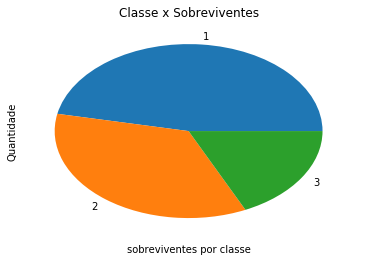

In [193]:
#demonstrar o gráfico através da média da coluna Pclass a partir da relação com coluna Sobrevivente
df.groupby(['Pclass']).mean()['Survived'].plot(kind='pie', title='Classe x Sobreviventes')
plt.xlabel('sobreviventes por classe')
plt.ylabel('Quantidade')
plt.show()

# Qual a relação entre a faixa etária dos sobreviventes?

    Conseguimos verificar que um número maior de crianças sobreviveram aos que constavam como passageiros, logo, conclui-se 
    que muitas não estavam registradas como passageiras. Além disso, os sobreviventes idosos foi um pouco menor do que o 
    total de passageiros idosos, e ainda verifica que o maior percentual de sobreviventes foram adultos, contudo, vale
    ressaltar que era o maior número de passageiros.

In [203]:
#identificar através da coluna Age a faixa etária a partir da relação com coluna Sobrevivente
df["faixa_etaria"] = pd.cut(df.Age, [0, 14, 50, 150], labels=["criancas", "adultos", "idosos"])

O gráfico corrobora ao elemento analisado acima.

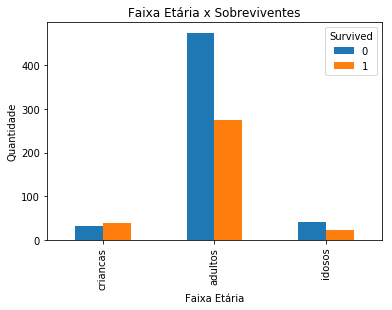

In [205]:
df.groupby(['faixa_etaria', 'Survived']).size().unstack().plot.bar()
plt.title('Faixa Etária x Sobreviventes')
plt.xlabel('Faixa Etária')
plt.ylabel('Quantidade')
plt.show()

# Qual a realação entre as tarifas pagas pelas pessoas e os sobreviventes do Titanic? 
    
   Conseguimos verificar as faixas de tarifa entre os quais a maioria dos ppassageiros que pagaram tarifas mais baixas, porém,
   foram os que menos sobreviveram. E ainda, vale destacar em relação os que pagaram uma tarifa de preço médio identifica-se 
   um elemento mais equilibrado entre os passageiros e os sobreviventes, e outro ponto é a questão dos pagaram da tarifa alta
   sobreviveram mais que os níveis de passageiros.

In [209]:
print(media('Fare'))

[32.2042079685746]


In [210]:
#identificar através da média da coluna Fare a partir da relação com coluna Sobrevivente
df["Tarifa"] = pd.cut(df.Fare, [0, 14, 50, 150], labels=["Baixa", "Média", "Alta"])

O gráfico corrobora ao elemento analisado acima.

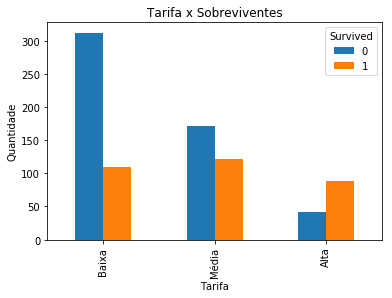

In [211]:
df.groupby(['Tarifa', 'Survived']).size().unstack().plot.bar()
plt.title('Tarifa x Sobreviventes')
plt.xlabel('Tarifa')
plt.ylabel('Quantidade')
plt.show()

# Qual o sexo que em média tem mais sobreviventes no Titanic? 

Feminino, identifica-se que dentre os sobreviventes um percentual extremamente maior de sobreviventes são mulheres, contudo, vale ressaltar que os homens eram em maior percentual de passageiros.

In [123]:
#identificar através da média da coluna Sex a partir da relação com coluna Sobrevivente
df.groupby(['Sex']).mean()['Survived']

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

O gráfico corrobora ao elemento analisado acima.

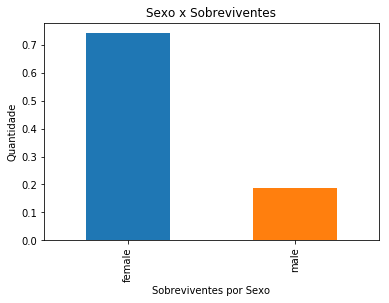

In [195]:
#demonstrar o gráfico através da média da coluna Sex a partir da relação com coluna Sobrevivente
df.groupby(['Sex']).mean()['Survived'].plot(kind='bar', title='Sexo x Sobreviventes')
plt.xlabel('Sobreviventes por Sexo')
plt.ylabel('Quantidade')
plt.show()

# Qual a relação entre o número de parentes abordos e sobreviventes?
    
    Percebe-se que a presença de número razoável de parente permitiu um maior número de sobreviventes.
     

In [133]:
#identificar através da média da coluna parentes a partir da relação com coluna sobrevivente
df.groupby(['Parch']).mean()['Survived']

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

O gráfico corrobora ao elemento analisado acima.

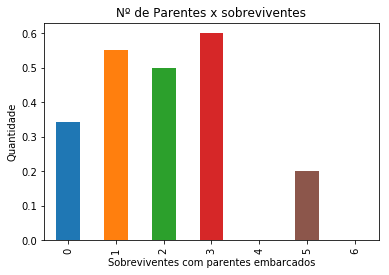

In [196]:
#demonstrar o gráfico através da média da coluna parentes a partir da relação com coluna sobrevivente
df.groupby(['Parch']).mean()['Survived'].plot(kind='bar', title='Nº de Parentes x sobreviventes')
plt.xlabel('Sobreviventes com parentes embarcados')
plt.ylabel('Quantidade')
plt.show()

# Conclusão:

Sendo assim, observa-se alguns pontos relevantes da analise de dados como o núumero de sobreviventes que compreende a 38% dos passageiros um número relativamente baixo. 

Como também, que dentre os sobreviventes a primeira classe teve maior número apesar de ser classe intermediária ao números de passageiros. 

Além disso, vale destacar dois pontos que entre os sobreviventes maior percentual de mulheres mesmo sendo em menor escala de passageiros e ainda fato significativo quando se tinha um número pequeno de parentes elevou o número de sobrevivência.

E ainda, deve destacar o elemento dos preços da tarifa o qual se destaca que os passageiros que pagaram as tarifas mais alta
tiveram maior percentual de sobrevivência em relação ao número de passageiros.

Logo, deve-se analisar outros elementos em analises futuras como verificar a relação entre localização das cabines com a 
possibilidade de sobreviver, como também, identificar se o local de embarque tem relação com a sobrevivência.

# Limitações:

Diante dos elementos exposto obteve-se alguns contratempos em relação analise de dados a partir de dados faltantes, como idade levando ao preenchimento dos dados faltantes pela média acarretando uma imprecisão da analise. Como também, em relação ao sexo ter dados faltantes ao qual não foram preenchidos para não prejudicar ainda mais a analise.

Outro ponto vale ressaltar é questão da coluna Sibsip que indica que existe conjugue mais não detalha, desta forma, pode está sendo compartilhado o número distinto do real já que o nome dos conjugues não são associados.